In [1]:
import random
import time

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.examples.tutorials.mnist import input_data

# Tensorflow에 있는 MNIST 데이터를 이용하였음.
# image는 784 (28*28)개의 0.0~1.0 사이의 값으로 표현된 이미지
# label은 10개 (0~9) 까지의 class로 one_hot 데이터 형식
# train은 55000개, test는 10000개
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
print(np.shape(mnist.train.images))
print(np.shape(mnist.train.labels))
print(np.shape(mnist.test.images))
print(np.shape(mnist.test.labels))

X_train = mnist.train.images
Y_train = mnist.train.labels
nb_features = 784
nb_classes = 10

C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWa

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)


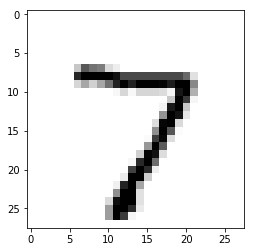

In [9]:
# 데이터 구경하기
plt.imshow(mnist.test.images[0:1].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()

### 1. Logistic (regression) classification

In [10]:
# 이거 스터디 할 때는 문제없는데 왜 MNIST에 적용하면 문제가 되는거지?

# 1. Logistic (regression) classification
X = tf.placeholder(tf.float32, [None, nb_features])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([nb_features, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis using sigmoid : tf.div(1., 1. + tf.exp(tf.matmul(X, W) + b))
#hypothesis =  tf.sigmoid(tf.matmul(X, W) + b)  
hypothesis = tf.div(1., 1. + tf.exp(tf.matmul(X, W) + b))

# Simplified cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis))
# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

# Accuracy computation
# True if hypothesis > 0.5
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

#launch the graph in a session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(100):
        sess.run(optimizer, feed_dict={X: X_train, Y: Y_train})
        
        if i % 20 == 0:
            current_cost = sess.run(cost, feed_dict={X: X_train, Y: Y_train})
            print('step : %04d, cost: %.5f' % (i, current_cost))
            
    print('Learning finished.')
    # Test the model using test sets
    print("Accuracy: %.3f " % accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    
    # Show random data
    r = random.randint(0, mnist.test.num_examples-1)
    print('Prediction : ', tf.arg_max(mnist.test.images[r:r+1], 1))
    print('Label : ', sess.run(tf.arg_max(hypothesis, 1)))
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.show()

step : 0000, cost: nan
step : 0020, cost: nan
step : 0040, cost: nan
step : 0060, cost: nan
step : 0080, cost: nan
Learning finished.
Accuracy: 0.900 
Instructions for updating:
Use `argmax` instead
Prediction :  Tensor("ArgMax:0", shape=(1,), dtype=int64)


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_4' with dtype float and shape [?,784]
	 [[node Placeholder_4 (defined at <ipython-input-10-61d572d64e99>:4)  = Placeholder[dtype=DT_FLOAT, shape=[?,784], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder_4', defined at:
  File "C:\Users\Hyun-Jin\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Hyun-Jin\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\Hyun-Jin\Anaconda3\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "C:\Users\Hyun-Jin\Anaconda3\lib\asyncio\base_events.py", line 1432, in _run_once
    handle._run()
  File "C:\Users\Hyun-Jin\Anaconda3\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 456, in _handle_events
    self._handle_recv()
  File "C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 486, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 438, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-61d572d64e99>", line 4, in <module>
    X = tf.placeholder(tf.float32, [None, nb_features])
  File "C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1747, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 6251, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3274, in create_op
    op_def=op_def)
  File "C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_4' with dtype float and shape [?,784]
	 [[node Placeholder_4 (defined at <ipython-input-10-61d572d64e99>:4)  = Placeholder[dtype=DT_FLOAT, shape=[?,784], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


## 2. Logistic classification (Softmax classfier)

In [19]:
# 2. Logistic classification (Softmax classfier)
X = tf.placeholder(tf.float32, [None, nb_features])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([nb_features, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# case 1. Cross entropy
#logits = tf.matmul(X,W) + b
#hypothesis = tf.nn.softmax(logits)
#cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1)) 
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# case 2. fancy Softmax by logits
logits = tf.matmul(X,W) + b
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y_train) #label must be one-hot
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Evaluation Model
correct = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

#launch the graph in a session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(100):
        sess.run(optimizer, feed_dict={X: X_train, Y: Y_train})
        
        if i % 20 == 0:
            current_cost = sess.run(cost, feed_dict={X: X_train, Y: Y_train})
            print('step : %04d, cost: %.5f' % (i, current_cost))
            
    print('Learning finished.')
    # Test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

step : 0000, cost: 12.070902
step : 0020, cost: 7.864077
step : 0040, cost: 6.092525
step : 0060, cost: 4.938337
step : 0080, cost: 4.160623
Learning finished.
Accuracy:  0.4402


### 2.1 Softmax classifier Parameters

In [2]:
# 2.1 테스트를 위하여 기본 모델 셋팅
X = tf.placeholder(tf.float32, [None, nb_features])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([nb_features, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

#fancy Softmax by logits
logits = tf.matmul(X,W) + b
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y) #label must be one-hot
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Evaluation Model
correct = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

NameError: name 'tf' is not defined

In [30]:
# Ver1 (기본 테스팅)
with tf.Session() as sess:
    start_time = time.time()
    
    sess.run(tf.global_variables_initializer())
    
    for step in range(501):
        sess.run(optimizer, feed_dict= {X : X_train, Y: Y_train}) # 한번에 모든 데이터 학습
    
        if(step % 100 == 0):
            r_cost, r_accuracy = sess.run([cost, accuracy], feed_dict= {X: mnist.test.images, Y: mnist.test.labels})
            print("[{0} step, {1:0.2f}s pass] cost: {2:0.5f} , accuracy: {3:0.2f} %".format(step, (time.time()-start_time), r_cost, r_accuracy*100))
    
    result = sess.run(accuracy, feed_dict= {X: mnist.test.images, Y: mnist.test.labels})
    print("---Report---")
    print("Time: {0:0.2f}s , accuracy: {1:0.2f} %".format((time.time()-start_time), result*100))

[0 step, 0.58s pass] cost: 15.98284 , accuracy: 11.15 %
[100 step, 15.16s pass] cost: 3.53905 , accuracy: 44.92 %
[200 step, 31.75s pass] cost: 2.19746 , accuracy: 60.83 %
[300 step, 48.10s pass] cost: 1.71044 , accuracy: 67.72 %
[400 step, 64.52s pass] cost: 1.45689 , accuracy: 71.98 %
[500 step, 80.67s pass] cost: 1.29827 , accuracy: 74.73 %
---Report---
Time: 80.75s , accuracy: 74.73 %


In [37]:
# Ver 2 (epoch, batch)
for training_epochs in range(10, 60, 20):
    for batch_size in range(100, 600, 200):
        start_time = time.time()
        
        #launch the graph in a session
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            
            print('epoch, batch_size = [%02d, %02d]' % (training_epochs, batch_size))
            for epoch in range(training_epochs + 1):
                avg_cost = 0
                total_batch = int(mnist.train.num_examples / batch_size)
    
                for i in range(total_batch + 1):
                    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
                    sess.run(optimizer, feed_dict={X: batch_xs, Y: batch_ys})
                    avg_cost += sess.run(cost, feed_dict={X: batch_xs, Y: batch_ys})
                
                if epoch % 10 == 0:
                    r_cost, r_accuracy = sess.run([cost, accuracy], feed_dict= {X: mnist.test.images, Y: mnist.test.labels})
                    print("[epoch {0}, {1:0.2f}s pass] cost: {2:0.5f} , accuracy: {3:0.2f} %".format(epoch, (time.time()-start_time), r_cost, r_accuracy*100));    
            print('== Learning finished ==')

epoch, batch_size = [10, 100]
[epoch 0, 1.79s pass] cost: 1.19406 , accuracy: 75.81 %
[epoch 10, 11.02s pass] cost: 0.49858 , accuracy: 88.50 %
== Learning finished ==
epoch, batch_size = [10, 300]
[epoch 0, 1.02s pass] cost: 2.23098 , accuracy: 61.37 %
[epoch 10, 6.84s pass] cost: 0.69606 , accuracy: 85.09 %
== Learning finished ==
epoch, batch_size = [10, 500]
[epoch 0, 1.09s pass] cost: 3.32122 , accuracy: 47.96 %
[epoch 10, 7.32s pass] cost: 0.90019 , accuracy: 82.02 %
== Learning finished ==
epoch, batch_size = [30, 100]
[epoch 0, 1.31s pass] cost: 1.18397 , accuracy: 76.42 %
[epoch 10, 10.53s pass] cost: 0.49518 , accuracy: 88.56 %
[epoch 20, 19.81s pass] cost: 0.41887 , accuracy: 89.60 %
[epoch 30, 30.11s pass] cost: 0.38300 , accuracy: 90.25 %
== Learning finished ==
epoch, batch_size = [30, 300]
[epoch 0, 1.08s pass] cost: 2.43496 , accuracy: 57.15 %
[epoch 10, 7.14s pass] cost: 0.69485 , accuracy: 84.61 %
[epoch 20, 14.25s pass] cost: 0.55857 , accuracy: 87.27 %
[epoch 30, 21

## 3. Neural Net

In [3]:
# Ver3 (Neural Net : 5 Layers + sigmoid)
Inputs = 784
classes = 10

X = tf.placeholder(tf.float32, [None, nb_features])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([nb_features, 30]), name='weight1')
b = tf.Variable(tf.random_normal([30]), name='bias1')

H_W1 = tf.Variable(tf.random_normal([30, 25]), name='weight2')
H_b1 = tf.Variable(tf.random_normal([25]), name='bias2')

H_W2 = tf.Variable(tf.random_normal([25, 20]), name='weight3')
H_b2 = tf.Variable(tf.random_normal([20]), name='bias3')

H_W3 = tf.Variable(tf.random_normal([20, 15]), name='weight4')
H_b3 = tf.Variable(tf.random_normal([15]), name='bias4')

last_W = tf.Variable(tf.random_normal([15, nb_classes]), name='weight5')
last_b = tf.Variable(tf.random_normal([nb_classes]), name='bias5')

layer1 = tf.sigmoid(tf.matmul(X, W) + b)
layer2 = tf.sigmoid(tf.matmul(layer1, H_W1) + H_b1)
layer3 = tf.sigmoid(tf.matmul(layer2, H_W2) + H_b2)
layer4 = tf.sigmoid(tf.matmul(layer3, H_W3) + H_b3)

logits = tf.matmul(layer4, last_W) + last_b
hypothesis = tf.nn.softmax(logits)

# Cross entropy
#cost = tf.reduce_mean(- tf.reduce_sum( Y * tf.log(hypothesis), axis=1 )) 

#fancy Softmax by logits
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y) #label must be one-hot
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Evaluation Model
prediction = tf.argmax(hypothesis, 1)
correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

traing_epochs = 50
batch_size = 100

with tf.Session() as sess:
    start_time = time.time()
    
    sess.run(tf.global_variables_initializer())
    for epoch in range(traing_epochs+1):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict= {X : batch_x, Y: batch_y}) # 한번당 batch_size만큼 학습
            avg_cost += c / total_batch
        
        if(epoch % 10 == 0):
            r_cost, r_accuracy = sess.run([cost, accuracy], feed_dict= {X: mnist.test.images, Y: mnist.test.labels})
            print("[{0} epoch, {1:0.2f}s pass] cost: {2:0.5f} , accuracy: {3:0.2f} %".format(epoch, (time.time()-start_time), r_cost, r_accuracy*100))
    
    result = sess.run(accuracy, feed_dict= {X: mnist.test.images, Y: mnist.test.labels})
    print("---Report---")
    print("Time: {0:0.2f}s , accuracy: {1:0.2f} %".format((time.time()-start_time), result*100))

[0 epoch, 1.86s pass] cost: 1.66309 , accuracy: 45.78 %
[10 epoch, 20.51s pass] cost: 0.52851 , accuracy: 83.52 %
[20 epoch, 40.72s pass] cost: 0.39451 , accuracy: 87.75 %
[30 epoch, 60.45s pass] cost: 0.32786 , accuracy: 90.11 %
[40 epoch, 82.47s pass] cost: 0.29087 , accuracy: 91.35 %
[50 epoch, 103.14s pass] cost: 0.26887 , accuracy: 91.94 %
---Report---
Time: 103.20s , accuracy: 91.94 %


In [4]:
# Ver4 (Neural Net : 5 Layers + relu, AdamOptimizer)

# 50, 100 : Time: 24.79s , accuracy: 95.36 %

#parameters
learning_rate = 0.01
traing_epochs = 50
batch_size = 100

Inputs = 784
classes = 10

X = tf.placeholder(tf.float32, [None, Inputs])
Y = tf.placeholder(tf.float32, [None, classes])

W = tf.Variable(tf.random_normal([Inputs, 30]), name='weight1')
b = tf.Variable(tf.random_normal([30]), name='bias1')

H_W1 = tf.Variable(tf.random_normal([30, 25]), name='weight2')
H_b1 = tf.Variable(tf.random_normal([25]), name='bias2')

H_W2 = tf.Variable(tf.random_normal([25, 20]), name='weight3')
H_b2 = tf.Variable(tf.random_normal([20]), name='bias3')

H_W3 = tf.Variable(tf.random_normal([20, 15]), name='weight4')
H_b3 = tf.Variable(tf.random_normal([15]), name='bias4')

last_W = tf.Variable(tf.random_normal([15, classes]), name='weight5')
last_b = tf.Variable(tf.random_normal([classes]), name='bias5')

layer1 = tf.nn.relu(tf.matmul(X, W) + b)
layer2 = tf.nn.relu(tf.matmul(layer1, H_W1) + H_b1)
layer3 = tf.nn.relu(tf.matmul(layer2, H_W2) + H_b2)
layer4 = tf.nn.relu(tf.matmul(layer3, H_W3) + H_b3)

logits = tf.matmul(layer4, last_W) + last_b

#fancy Softmax by logits
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y) #label must be one-hot
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluation Model
correct = tf.equal(tf.argmax(logits, axis=1), tf.argmax(Y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.Session() as sess:
    start_time = time.time()
    
    sess.run(tf.global_variables_initializer())
    for epoch in range(traing_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict= {X : batch_x, Y: batch_y}) # 한번당 batch_size만큼 학습
            avg_cost += c / total_batch
        
        if(epoch % 10 == 0):
            r_cost, r_accuracy = sess.run([cost, accuracy], feed_dict= {X: mnist.test.images, Y: mnist.test.labels})
            print("[{0} epoch, {1:0.2f}s pass] cost: {2:0.5f} , accuracy: {3:0.2f} %".format(epoch, (time.time()-start_time), r_cost, r_accuracy*100))
    
    result = sess.run(accuracy, feed_dict= {X: mnist.test.images, Y: mnist.test.labels})
    print("---Report---")
    print("Time: {0:0.2f}s , accuracy: {1:0.2f} %".format((time.time()-start_time), result*100))

[0 epoch, 0.74s pass] cost: 2.15098 , accuracy: 19.38 %
[10 epoch, 5.58s pass] cost: 0.44486 , accuracy: 87.95 %
[20 epoch, 10.42s pass] cost: 0.25768 , accuracy: 93.93 %
[30 epoch, 15.38s pass] cost: 0.23350 , accuracy: 94.86 %
[40 epoch, 20.36s pass] cost: 0.22672 , accuracy: 95.42 %
---Report---
Time: 24.79s , accuracy: 95.36 %


In [2]:
# Ver5 (Neural Net : 5 Layers + relu, AdamOptimizer + Xavier Initialize)

# 30, 100 : Time: 45.87s , accuracy: 97.02 %

#parameters
learning_rate = 0.01
traing_epochs = 30
batch_size = 100

Inputs = 784
classes = 10
hide = 256

X = tf.placeholder(tf.float32, [None, Inputs])
Y = tf.placeholder(tf.float32, [None, classes])

W = tf.get_variable("weight1", shape=[Inputs, hide], initializer=tf.contrib.layers.xavier_initializer());
b = tf.Variable(tf.random_normal([hide]), name='bias1')

H_W1 = tf.get_variable("weight2", shape=[hide, hide], initializer=tf.contrib.layers.xavier_initializer());
H_b1 = tf.Variable(tf.random_normal([hide]), name='bias2')

H_W2 = tf.get_variable("weight3", shape=[hide, hide], initializer=tf.contrib.layers.xavier_initializer());
H_b2 = tf.Variable(tf.random_normal([hide]), name='bias3')

H_W3 = tf.get_variable("weight4", shape=[hide, hide], initializer=tf.contrib.layers.xavier_initializer());
H_b3 = tf.Variable(tf.random_normal([hide]), name='bias4')

last_W = tf.get_variable("weight5", shape=[hide, classes], initializer=tf.contrib.layers.xavier_initializer());
last_b = tf.Variable(tf.random_normal([classes]), name='bias5')

layer1 = tf.nn.relu(tf.matmul(X, W) + b)
layer2 = tf.nn.relu(tf.matmul(layer1, H_W1) + H_b1)
layer3 = tf.nn.relu(tf.matmul(layer2, H_W2) + H_b2)
layer4 = tf.nn.relu(tf.matmul(layer3, H_W3) + H_b3)

logits = tf.matmul(layer4, last_W) + last_b

#fancy Softmax by logits
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y) #label must be one-hot
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluation Model
correct = tf.equal(tf.argmax(logits, axis=1), tf.argmax(Y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.Session() as sess:
    start_time = time.time()
    
    sess.run(tf.global_variables_initializer())
    for epoch in range(traing_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict= {X : batch_x, Y: batch_y}) # 한번당 batch_size만큼 학습
            avg_cost += c / total_batch
        
        if(epoch % 10 == 0):
            r_cost, r_accuracy = sess.run([cost, accuracy], feed_dict= {X: mnist.test.images, Y: mnist.test.labels})
            print("[{0} epoch, {1:0.2f}s pass] cost: {2:0.5f} , accuracy: {3:0.2f} %".format(epoch, (time.time()-start_time), r_cost, r_accuracy*100))
    
    result = sess.run(accuracy, feed_dict= {X: mnist.test.images, Y: mnist.test.labels})
    print("---Report---")
    print("Time: {0:0.2f}s , accuracy: {1:0.2f} %".format((time.time()-start_time), result*100))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

[0 epoch, 5.80s pass] cost: 0.19258 , accuracy: 94.54 %
[10 epoch, 60.10s pass] cost: 0.17463 , accuracy: 96.52 %
[20 epoch, 113.67s pass] cost: 0.15517 , accuracy: 96.92 %
---Report---
Time: 164.33s , accuracy: 97.34 %


In [2]:
# Ver6 (Neural Net : 5 Layers + relu, AdamOptimizer + Xavier Initialize + dropout)

#parameters
learning_rate = 0.01
traing_epochs = 15
batch_size = 100

Inputs = 784
classes = 10
hide = 512

X = tf.placeholder(tf.float32, [None, Inputs])
Y = tf.placeholder(tf.float32, [None, classes])
keep_prob = tf.placeholder(tf.float32) # dropout (keep_prob) rate 0.7 on the training

W = tf.get_variable("weight1", shape=[Inputs, hide], initializer=tf.contrib.layers.xavier_initializer());
b = tf.Variable(tf.random_normal([hide]), name='bias1')

H_W1 = tf.get_variable("weight2", shape=[hide, hide], initializer=tf.contrib.layers.xavier_initializer());
H_b1 = tf.Variable(tf.random_normal([hide]), name='bias2')

H_W2 = tf.get_variable("weight3", shape=[hide, hide], initializer=tf.contrib.layers.xavier_initializer());
H_b2 = tf.Variable(tf.random_normal([hide]), name='bias3')

H_W3 = tf.get_variable("weight4", shape=[hide, hide], initializer=tf.contrib.layers.xavier_initializer());
H_b3 = tf.Variable(tf.random_normal([hide]), name='bias4')

last_W = tf.get_variable("weight5", shape=[hide, classes], initializer=tf.contrib.layers.xavier_initializer());
last_b = tf.Variable(tf.random_normal([classes]), name='bias5')

_layer1 = tf.nn.relu(tf.matmul(X, W) + b)
layer1 = tf.nn.dropout(_layer1, keep_prob=keep_prob)

_layer2 = tf.nn.relu(tf.matmul(layer1, H_W1) + H_b1)
layer2 = tf.nn.dropout(_layer2, keep_prob=keep_prob)

_layer3 = tf.nn.relu(tf.matmul(layer2, H_W2) + H_b2)
layer3 = tf.nn.dropout(_layer3, keep_prob=keep_prob)

_layer4 = tf.nn.relu(tf.matmul(layer3, H_W3) + H_b3)
layer4 = tf.nn.dropout(_layer4, keep_prob=keep_prob)

logits = tf.matmul(layer4, last_W) + last_b

#fancy Softmax by logits
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y) #label must be one-hot
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluation Model
correct = tf.equal(tf.argmax(logits, axis=1), tf.argmax(Y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.Session() as sess:
    start_time = time.time()
    
    sess.run(tf.global_variables_initializer())
    for epoch in range(traing_epochs+1):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict= {X : batch_x, Y: batch_y, keep_prob: 0.7}) # 한번당 batch_size만큼 학습
            avg_cost += c / total_batch
        
        if(epoch % 5 == 0):
            r_cost, r_accuracy = sess.run([cost, accuracy], feed_dict= {X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1.0})
            print("[{0} epoch, {1:0.2f}s pass] cost: {2:0.5f} , accuracy: {3:0.2f} %".format(epoch, (time.time()-start_time), r_cost, r_accuracy*100))
    
    result = sess.run(accuracy, feed_dict= {X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1.0})
    print("---Report---")
    print("Time: {0:0.2f}s , accuracy: {1:0.2f} %".format((time.time()-start_time), result*100))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

[0 epoch, 20.01s pass] cost: 0.36709 , accuracy: 91.22 %
[5 epoch, 111.90s pass] cost: 0.33593 , accuracy: 92.46 %
[10 epoch, 205.12s pass] cost: 0.58201 , accuracy: 86.65 %
[15 epoch, 297.73s pass] cost: 0.58889 , accuracy: 84.15 %
---Report---
Time: 298.85s , accuracy: 84.15 %
